# Summary

-----

# Imports

In [1]:
%run imports.ipynb

2016-08-15 13:47:46.085637


In [2]:
print2 = ascommon.df_tools.print2

In [3]:
NOTEBOOK_NAME = 'core_vs_interface_data_statistics'

# Load data

In [4]:
db = datapkg.MySQL(
    os.environ['DATAPKG_CONNECTION_STR'], 
    NOTEBOOK_NAME, 
    None, 
    echo=False)

### Load DATA

This includes both calculated (with $\Delta \Delta G$ prediction) and not calculated (without $\Delta \Delta G$ prediction).

In [5]:
with open('core_load_data/DATA.pkl', 'rb') as ifh:
    CORE_DATA = pickle.load(ifh)

In [6]:
with open('interface_load_data/DATA.pkl', 'rb') as ifh:
    INTERFACE_DATA = pickle.load(ifh)

In [7]:
for key in INTERFACE_DATA:
    if key in ['humsavar', 'clinvar', 'cosmic']:
        print(key)
        INTERFACE_DATA[key] = (
            INTERFACE_DATA[key][
                (INTERFACE_DATA[key]['uniprot_id_1'].isnull() | 
                 ~INTERFACE_DATA[key]['uniprot_id_1'].str.contains('-').astype(bool)) &
                (INTERFACE_DATA[key]['uniprot_id_2'].isnull() | 
                 ~INTERFACE_DATA[key]['uniprot_id_2'].str.contains('-').astype(bool))
            ]
        )

clinvar
humsavar
cosmic


### Load DATA_DF

This only includes calculated mutations (with $\Delta \Delta G$ prediction).

In [8]:
CORE_DATA_DF = pd.read_pickle('core_load_data/DATA_DF.pkl')
#DATA_DF['ddg_exp'] = DATA_DF['ddg_exp'].astype(float)

In [9]:
INTERFACE_DATA_DF = pd.read_pickle('interface_load_data/DATA_DF.pkl')
#INTERFACE_DATA_DF['ddg_exp'] = DATA_DF['ddg_exp'].astype(float)

In [10]:
INTERFACE_DATA_DF = (
    INTERFACE_DATA_DF[
        (INTERFACE_DATA_DF['uniprot_id_1'].isnull() | 
         ~INTERFACE_DATA_DF['uniprot_id_1'].str.contains('-').astype(bool)) &
        (INTERFACE_DATA_DF['uniprot_id_2'].isnull() | 
         ~INTERFACE_DATA_DF['uniprot_id_2'].str.contains('-').astype(bool))
    ]
)

In [11]:
for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print(dataset)
    print(CORE_DATA_DF[CORE_DATA_DF['dataset'] == dataset]['dg_change'].mean())
    print(INTERFACE_DATA_DF[INTERFACE_DATA_DF['dataset'] == dataset]['dg_change'].mean())
    print()

humsavar
1.8222869245919633
0.5409173502362816

clinvar
1.2387911468718065
0.46514217731460805

cosmic
1.3358924740284919
0.476354024383122



In [12]:
df = CORE_DATA_DF

for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print(dataset)
    del_class_0_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 0]['dg_change'].mean()
    del_class_1_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 1]['dg_change'].mean()
    print(del_class_0_mean)
    print(del_class_1_mean)
    print(del_class_1_mean - del_class_0_mean, '<--')
    print()

humsavar
1.3079815867225104
2.7225633832569924
1.414581796534482 <--

clinvar
1.3326807407580807
1.8135561908779456
0.4808754501198649 <--

cosmic
1.1615266472367696
1.497473173127471
0.3359465258907015 <--



In [13]:
df = INTERFACE_DATA_DF

for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print(dataset)
    del_class_0_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 0]['dg_change'].mean()
    del_class_1_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 1]['dg_change'].mean()
    print(del_class_0_mean)
    print(del_class_1_mean)
    print(del_class_1_mean - del_class_0_mean, '<--')
    print()

humsavar
0.4855097731322783
0.6491342845652823
0.16362451143300405 <--

clinvar
0.49433441458046107
0.513189822933204
0.018855408352742964 <--

cosmic
0.5048255029868663
0.4913026185896868
-0.013522884397179524 <--



In [14]:
df = (
    INTERFACE_DATA_DF[
        (~INTERFACE_DATA_DF['uniprot_id_1'].str.contains('-').astype(bool) &
         ~INTERFACE_DATA_DF['uniprot_id_2'].str.contains('-').astype(bool))
    ]
)

for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print(dataset)
    del_class_0_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 0]['dg_change'].mean()
    del_class_1_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 1]['dg_change'].mean()
    print(del_class_0_mean)
    print(del_class_1_mean)
    print(del_class_1_mean - del_class_0_mean, '<--')
    print()

humsavar
0.46884846731550345
0.6491342845652823
0.18028581724977888 <--

clinvar
0.47746145299504006
0.513189822933204
0.03572836993816397 <--

cosmic
0.4609353198939083
0.4913026185896868
0.030367298695778533 <--



In [15]:
df = (
    INTERFACE_DATA_DF[
        (~INTERFACE_DATA_DF['uniprot_id_1'].str.contains('-').astype(bool) &
         ~INTERFACE_DATA_DF['uniprot_id_2'].str.contains('-').astype(bool))
    ]
)
df = (
    df
    .groupby(['dataset', 'uniprot_id_1', 'uniprot_mutation', 'del_class_exp'])
    ['dg_change']
    .agg('sum')
    .reset_index()
)

for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print(dataset)
    del_class_0_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 0]['dg_change'].mean()
    del_class_1_mean = df[(df['dataset'] == dataset) & df['del_class_exp'] == 1]['dg_change'].mean()
    print(del_class_0_mean)
    print(del_class_1_mean)
    print(del_class_1_mean - del_class_0_mean, '<--')
    print()

humsavar
0.642943449497972
0.964223708643527
0.321280259145555 <--

clinvar
0.6550642171582428
0.7380596171408501
0.0829953999826073 <--

cosmic
0.6528284444077658
0.6683688807613289
0.01554043635356317 <--



In [16]:
df = CORE_DATA_DF

for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print('{:10s}: {:.3f}%'.format(
            dataset,
            (df[df['dataset'] == dataset]['del_class_exp'] == 1).sum() * 100 / df.shape[0]))

humsavar  : 3.569%
clinvar   : 6.156%
cosmic    : 59.389%


In [17]:
df = INTERFACE_DATA_DF

for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print('{:10s}: {:.3f}%'.format(
            dataset,
            (df[df['dataset'] == dataset]['del_class_exp'] == 1).sum() * 100 / df.shape[0]))

humsavar  : 6.537%
clinvar   : 9.928%
cosmic    : 63.737%


In [18]:
BOTH_DATA_DF = (
    CORE_DATA_DF
    .merge(
        INTERFACE_DATA_DF, 
        on=['uniprot_id', 'uniprot_mutation', 'dataset', 'del_class_exp'], 
        suffixes=('_core', '_interface'))
)

In [19]:
df = BOTH_DATA_DF

feature_list = [
    ('FoldX', 'dg_change'),
    ('Provean', 'provean_score'),
]

data_dict = {}
for dataset in ['humsavar', 'clinvar', 'cosmic']:
    print(dataset)
    df = BOTH_DATA_DF[BOTH_DATA_DF['dataset'] == dataset]
    data_list = []
    for f_name, f_column in feature_list:
        for cori in ['core', 'interface']:
            if f_column == 'dg_change':
                corr, pvalue = sp.stats.spearmanr(df['del_class_exp'], df[f_column + '_' + cori])  # .abs()
            else:
                corr, pvalue = sp.stats.spearmanr(df['del_class_exp'], df[f_column + '_' + cori])
            print('{:20s}: {:.3f} ({:.3e})'.format(f_name + ' ' + cori, corr, pvalue))
            data_list.append((f_name + ' ' + cori, corr,))
    print()
    data_dict[dataset] = data_list

humsavar
FoldX core          : 0.153 (2.147e-41)
FoldX interface     : 0.104 (3.994e-20)
Provean core        : -0.430 (0.000e+00)
Provean interface   : -0.388 (4.015e-275)

clinvar
FoldX core          : 0.134 (1.848e-47)
FoldX interface     : 0.054 (4.874e-09)
Provean core        : -0.330 (9.569e-292)
Provean interface   : -0.324 (8.829e-280)

cosmic
FoldX core          : 0.065 (5.383e-56)
FoldX interface     : 0.035 (4.547e-17)
Provean core        : -0.281 (0.000e+00)
Provean interface   : -0.282 (0.000e+00)



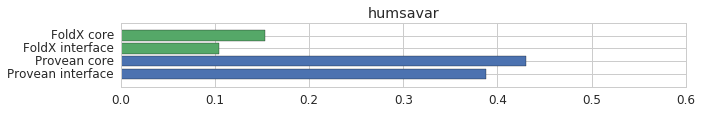

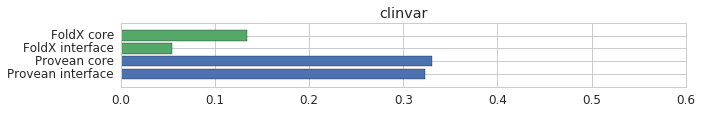

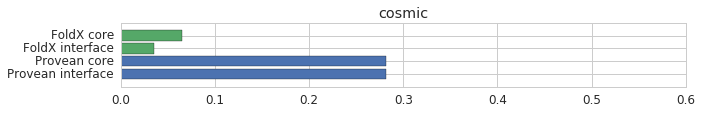

In [20]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)


def get_color(name):
    if 'provean' in name.lower():
        return sns.color_palette()[0]
    elif 'foldx' in name.lower():
        return sns.color_palette()[1]
    else:
        return sns.color_palette()[2]

    
for dataset in ['humsavar', 'clinvar', 'cosmic']:
    labels, y = list(zip(*data_dict[dataset]))
    labels = list(reversed(labels))
    y = list(reversed(y))
    colors = [get_color(n) for n in labels]
    fg, ax = plt.subplots(figsize=(10, 1.8))
    plt.barh(range(len(y)), [abs(f) for f in y], tick_label=labels, align='center', color=colors)
    plt.ylim(-1, len(y))
    plt.xlim(0, 0.6)
    plt.title(dataset)
    plt.tight_layout()
    plt.show()

## Group by protein

In [21]:
def get_partner_uniprot_id(uniprot_id, uniprot_id_1, uniprot_id_2):
    if uniprot_id == uniprot_id_1:
        return uniprot_id_2
    return uniprot_id_1

In [22]:
def get_spearman_corrs(gp):
    results = []
    for name, df in gp:
        df = df[['del_class_exp', 'dg_change', 'provean_score', 'core_or_interface']].dropna()
        results.append(
            (name, 
             sp.stats.spearmanr(df['del_class_exp'], df['dg_change'].abs())[0],
             sp.stats.spearmanr(df['del_class_exp'], df['provean_score'])[0],
             sp.stats.spearmanr(df['del_class_exp'], df['core_or_interface'])[0]))
    results_df = pd.DataFrame(results, columns=['uniprot_id', 'foldx_r', 'provean_r', 'interface_r'])
    return results_df

In [23]:
def get_interface(interface_df):
    return interface_df


def get_interface_agg(interface_df, agg_fn='mean'):
    interface_df = (
        interface_df
        .groupby(['uniprot_id', 'uniprot_mutation', 'del_class_exp'])
        [['dg_change', 'provean_score']]
        .agg(agg_fn)
        .reset_index()
    )
    return interface_df


interface_functions = OrderedDict([
        ('all', get_interface),
        ('mean', functools.partial(get_interface_agg, agg_fn='mean')),
        ('median', functools.partial(get_interface_agg, agg_fn='median')),
        ('min', functools.partial(get_interface_agg, agg_fn='min')),
        ('max', functools.partial(get_interface_agg, agg_fn='max')),
        ('std', functools.partial(get_interface_agg, agg_fn='std')),
        ('range', functools.partial(get_interface_agg, agg_fn=lambda x: max(x) - min(x))),
    ])


corrs_dict = {}
for i, dataset in enumerate(['humsavar', 'clinvar', 'cosmic']):
    # Core
    _core_df = CORE_DATA_DF[CORE_DATA_DF['dataset'] == dataset].copy()
    _core_df['core_or_interface'] = 0

    # Interface
    _interface_df = INTERFACE_DATA_DF[INTERFACE_DATA_DF['dataset'] == dataset].copy()
    
    corrs_list = []
    for j, (agg_name, agg_fn) in enumerate(interface_functions.items()):
        core_df = _core_df.copy()
        interface_df = agg_fn(_interface_df.copy())
        interface_df['core_or_interface'] = 1

        # Compute Spearman correlation for core and interface over the same set of proteins
        # SEPARATELY
        core_corr_df = get_spearman_corrs(core_df.groupby('uniprot_id'))
        interface_corr_df = get_spearman_corrs(interface_df.groupby('uniprot_id'))
        shared_uniprots = (
            set(core_corr_df[core_corr_df['foldx_r'].notnull()]['uniprot_id']) & 
            set(interface_corr_df[interface_corr_df['foldx_r'].notnull()]['uniprot_id']))
        core_corr_df = (
            core_corr_df[core_corr_df['uniprot_id'].isin(shared_uniprots)])
        interface_corr_df = (
            interface_corr_df[interface_corr_df['uniprot_id'].isin(shared_uniprots)])
        assert core_corr_df.shape[0] == interface_corr_df.shape[0]

        # TOGETHER
        core_df = core_df[core_df['uniprot_id'].isin(shared_uniprots)]
        interface_df = interface_df[interface_df['uniprot_id'].isin(shared_uniprots)]
        both_df = pd.concat([core_df, interface_df], ignore_index=True)
        both_corr_df = get_spearman_corrs(both_df.groupby('uniprot_id'))

        # 
        if j == 0:
            corrs_list.extend([
                ('Core FoldX {}'.format(agg_name), core_corr_df['foldx_r'].dropna().mean()),
                ('Core Provean {}'.format(agg_name), core_corr_df['provean_r'].dropna().mean()),
            ])
            
        corrs_list.extend([
            ('', 0),
            ('Interface FoldX {}'.format(agg_name), interface_corr_df['foldx_r'].dropna().mean()),
            ('Interface Provean {}'.format(agg_name), interface_corr_df['provean_r'].dropna().mean()),
            ('C & I FoldX {}'.format(agg_name), both_corr_df['foldx_r'].dropna().mean()),
            ('C & I Provean {}'.format(agg_name), both_corr_df['provean_r'].dropna().mean()),
            ('C & I is_interface {}'.format(agg_name), both_corr_df['interface_r'].dropna().mean()),
        ])
        
    corrs_dict[dataset] = corrs_list

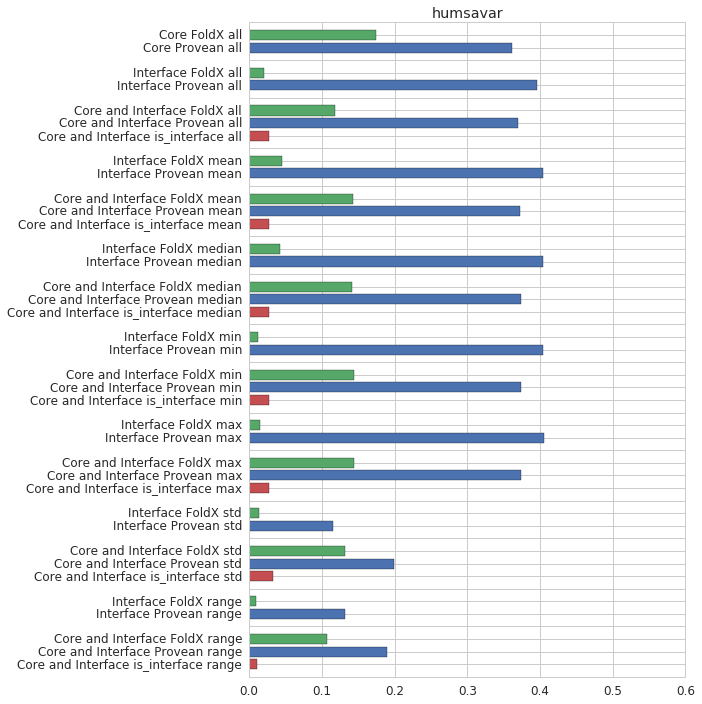

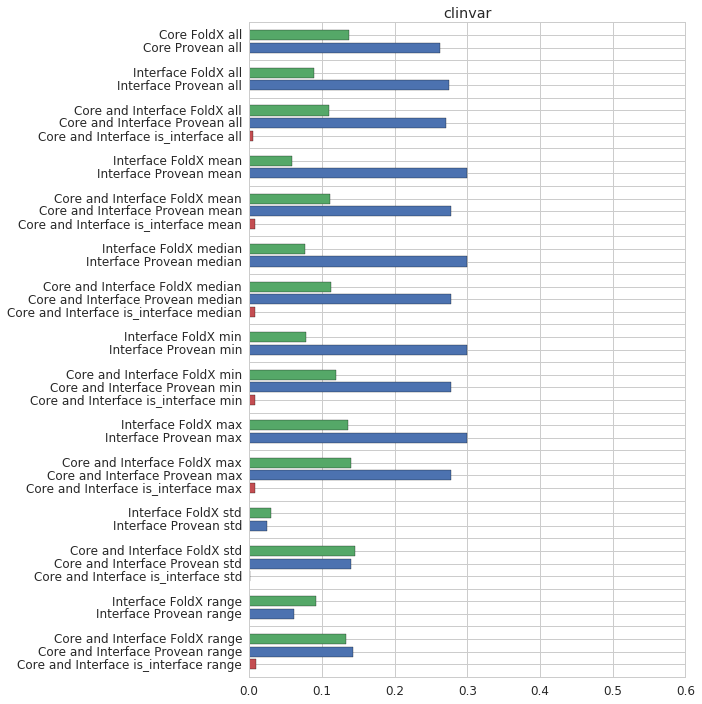

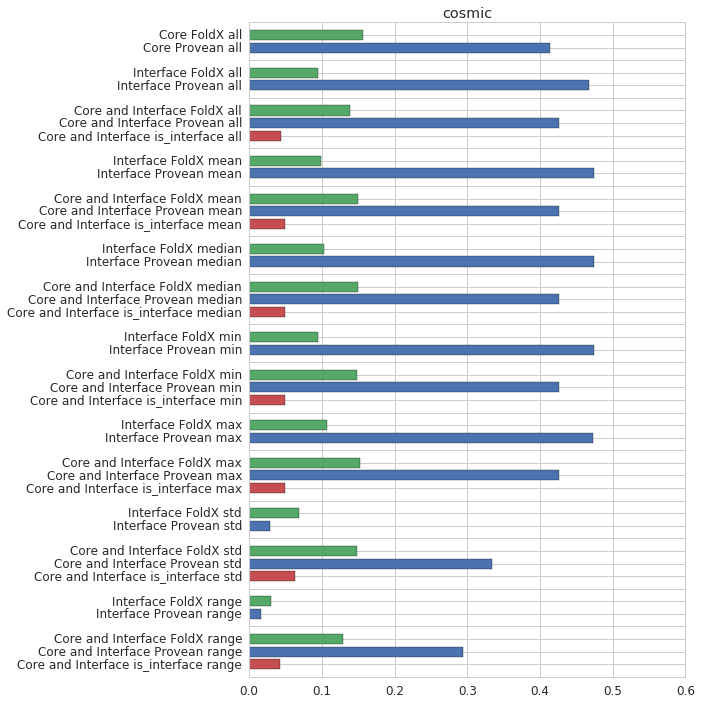

In [24]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)


def get_color(name):
    if 'provean' in name.lower():
        return sns.color_palette()[0]
    elif 'foldx' in name.lower():
        return sns.color_palette()[1]
    else:
        return sns.color_palette()[2]

    
def insert_space(labels, values):
    new_labels = []
    new_values = []
    is_ci = False
    for l, y in zip(labels, values):
        if not is_ci and 'C & I' in l:
            is_ci = True
            new_labels.append('')
            new_values.append(0)
        elif is_ci and 'C & I' not in l:
            is_ci = False
        new_labels.append(l)
        new_values.append(y)
    return new_labels, new_values


for dataset in ['humsavar', 'clinvar', 'cosmic']:
    labels, y = list(zip(*corrs_dict[dataset]))
    labels, y = insert_space(labels, y)
    labels = list(reversed(labels))
    labels = [l.replace('C & I', 'Core and Interface') for l in labels]
    y = list(reversed(y))
    colors = [get_color(n) for n in labels]
    fg, ax = plt.subplots(figsize=(10, 10))
    plt.barh(range(len(y)), [abs(f) for f in y], tick_label=labels, align='center', color=colors)
    plt.ylim(-1, len(y))
    plt.xlim(0, 0.6)
    plt.title(dataset)
    plt.tight_layout()
    plt.show()